In [ ]:
from sympy import init_printing
init_printing(use_latex='png', scale=1.05, order='grlex',
              forecolor='Black', backcolor='White', fontsize=10)

from sympy import *
from sympy import diff
x,y,c,a = symbols('x y c a')
import matplotlib.pyplot as plt
import math as math
import numpy as np
import sympy as sp

from sklearn.datasets import load_digits
digits = load_digits()


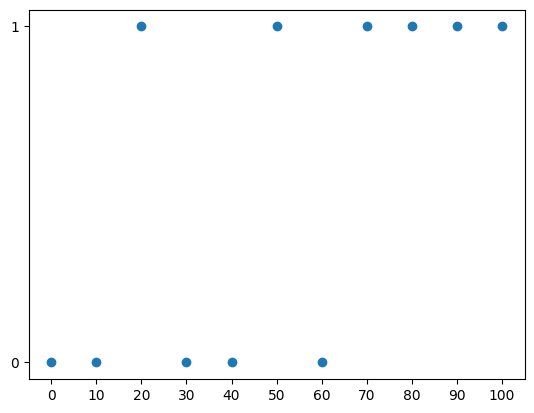

In [ ]:

# Data
x = [0 , 10, 20, 30, 40, 50, 60, 70, 80 , 90 , 100]
y = [0 , 0, 1, 0, 0, 1, 0, 1, 1 , 1 , 1] ## Temos uma incidência de uma determinada doença

fig, ax = plt.subplots()


ax.scatter(x, y)
ax.set( yticks =[0,1] , xticks = [0 , 10, 20, 30, 40, 50, 60, 70, 80 , 90 , 100])


plt.show()

In [ ]:
f =  1/(1+ math.e**((-1)*(a + c*x)))

In [ ]:
x = [0 , 10, 20, 30, 40, 50, 60, 70, 80 , 90 , 100]
x_min = min(x)
x_max = max(x)
x_norm = [(xi - x_min) / (x_max - x_min) for xi in x]
print(x_norm)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
def f(x, y):
   return -1/11 * (y*sp.log(1/(1+sp.exp((c + a*x)))) + (1 - y)*sp.log(1 - 1/(1+sp.exp((c + a*x)))))


In [ ]:
def soma_erro(f, list_x, list_y, r , t):
  i = 0
  erro_coef1 = 0
  erro_coef2 = 0
  while i < len(list_x):
   erro_coef1 += diff(f(list_x[i], list_y[i]), c).subs({c: r, a:t}).evalf()
   erro_coef2 += diff(f(list_x[i], list_y[i]),a).subs({c:r , a:t}).evalf()
   i +=1

  return erro_coef1 , erro_coef2

In [ ]:
list_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
list_y = [0 , 0, 1, 0, 0, 1, 0, 1, 1 , 1 , 1]

In [ ]:
def g(f , r , t):

  list_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  list_y = [0 , 0, 1, 0, 0, 1, 0, 1, 1 , 1 , 1]
  g1, g2 = soma_erro(f , list_x , list_y , r , t )

  return np.array([g1, g2])



In [ ]:
def grad( f , g , b , p , err):

  list_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  list_y = [0 , 0, 1, 0, 0, 1, 0, 1, 1 , 1 , 1]

  erro = 1
  i = 0
  z = np.array([0,0])
  while erro > err:
    z = b
    b = b - p * g(f, b[0], b[1])
    g1 , g2 = soma_erro(f , list_x , list_y , b[0] ,b[1])
    err = g1**2 + g2**2
    i+=1
  return b



In [ ]:
b = np.array([0.1,0.2])

In [ ]:
grad(f , g , b , 1 , 0.06)

In [ ]:
soma_erro(f , list_x , list_y , -4.140601607144454 ,0.08441681110611873)

(-0.189913822666978, -0.131870750868469)

In [ ]:
(-0.189913822666978)**2 + (-0.131870750868469)**2

0.05345715497459819

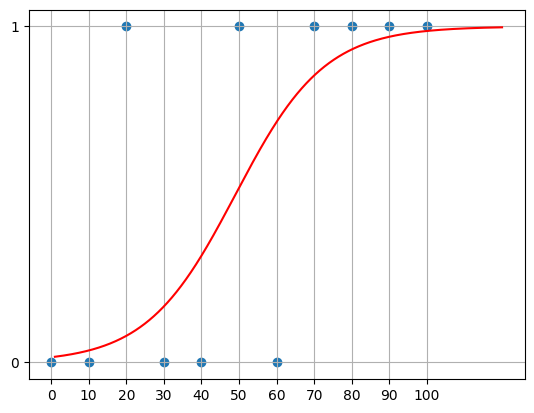

In [ ]:
def f(x):

 return x**3 + 1
x = [0 , 10, 20, 30, 40, 50, 60, 70, 80 , 90 , 100]
y = [0 , 0, 1, 0, 0, 1, 0, 1, 1 , 1 , 1]
fig, ax = plt.subplots()
ax.scatter(x,y)
x = np.arange(1,120,0.01)
f =  1/(1+ math.e**((-1)*(-4.140601607144454 + 0.08441681110611873*x)))
ax.set(yticks = [0,1], xticks = [0 , 10, 20, 30, 40, 50, 60, 70, 80 , 90 , 100])
plt.plot(x, f , color = 'r')
plt.grid()
plt.show()


In [ ]:
def risco(x):
  f =  1/(1+ math.e**((-1)*(-4.140601607144454 + 0.08441681110611873*x)))
  return print("o risco de se ter diabetes com ", x ,  "anos de idade é de: "  , f)

In [ ]:
risco(55)

o risco de se ter diabetes com  55 anos de idade é de:  0.6230050901935664


In [ ]:
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
digits = datasets.load_digits()

In [ ]:
np.size(digits.data[0])

64

In [ ]:
entrada = digits.data
classific = digits.target

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
entrada_treino, testeEntrada, classific_treino, testeClassific = train_test_split(entrada ,classific,test_size = 0.30, random_state =101)

In [ ]:
entrada[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.target[0]

0

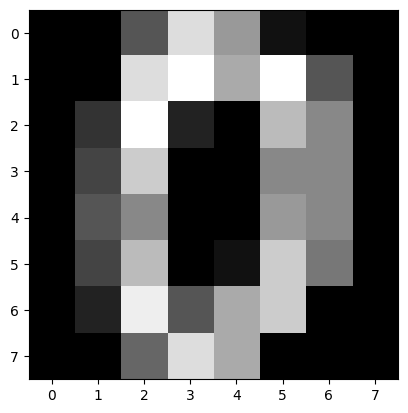

In [ ]:
plt.imshow(digits.images[0], cmap = 'gray')

In [ ]:
clf = LogisticRegression(random_state = 0).fit(entrada_treino,classific_treino)

In [ ]:
y_test = clf.predict(testeEntrada)

In [ ]:
y_test

array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0, 1, 7, 1, 6, 6, 8, 4, 9, 7, 0, 7, 7,
       6, 0, 2, 3, 5, 0, 0, 2, 4, 7, 0, 4, 3, 7, 1, 3, 6, 4, 8, 8, 9, 9,
       7, 9, 8, 6, 4, 3, 1, 3, 5, 8, 1, 1, 5, 5, 4, 1, 7, 2, 4, 4, 5, 8,
       0, 8, 1, 0, 7, 6, 7, 8, 6, 5, 1, 2, 0, 6, 1, 0, 1, 9, 1, 2, 6, 8,
       3, 4, 6, 4, 1, 3, 2, 5, 7, 1, 5, 0, 0, 6, 5, 0, 9, 8, 1, 9, 3, 2,
       7, 1, 8, 4, 8, 2, 4, 1, 2, 1, 3, 8, 9, 3, 1, 6, 9, 8, 3, 2, 7, 1,
       8, 9, 5, 2, 6, 5, 0, 3, 4, 0, 5, 0, 1, 1, 7, 4, 8, 6, 1, 3, 9, 1,
       4, 9, 5, 1, 7, 6, 7, 3, 0, 7, 5, 4, 9, 9, 8, 9, 6, 1, 0, 7, 7, 4,
       8, 4, 4, 7, 5, 9, 7, 9, 8, 7, 0, 0, 7, 4, 7, 1, 0, 4, 9, 4, 5, 7,
       2, 2, 5, 2, 3, 3, 5, 3, 9, 8, 4, 3, 4, 5, 2, 1, 6, 9, 9, 5, 7, 5,
       5, 7, 6, 2, 4, 6, 9, 5, 1, 9, 2, 2, 9, 6, 5, 2, 5, 3, 6, 8, 8, 5,
       5, 1, 9, 6, 0, 5, 1, 3, 8, 8, 4, 4, 4, 0, 5, 0, 4, 7, 8, 2, 2, 2,
       5, 9, 3, 9, 3, 5, 6, 4, 3, 2, 6, 1, 1, 7, 5, 2, 8, 1, 2, 1, 8, 5,
       5, 5, 4, 4, 9, 4, 9, 8, 0, 7, 4, 3, 4, 1, 8,

In [ ]:
clf.predict_proba(testeEntrada)

array([[1.43691904e-13, 4.09129606e-10, 1.82168862e-11, ...,
        9.99999941e-01, 4.40464811e-10, 5.41342580e-08],
       [8.35366745e-11, 3.23972903e-06, 1.00928369e-20, ...,
        1.09443028e-10, 8.58755424e-13, 7.18613354e-23],
       [1.54587823e-12, 1.76877716e-07, 4.09588109e-07, ...,
        9.99962223e-01, 3.17266728e-05, 5.40016424e-06],
       ...,
       [2.86527077e-07, 1.15328903e-11, 4.85131775e-13, ...,
        2.74058111e-09, 2.23988867e-08, 1.64901825e-11],
       [9.93766953e-20, 5.73248998e-15, 9.99999982e-01, ...,
        4.44998774e-16, 1.04563005e-16, 8.38139177e-16],
       [3.42281050e-04, 2.91865662e-10, 4.24512028e-08, ...,
        5.86442737e-07, 9.26589155e-05, 9.99442274e-01]])

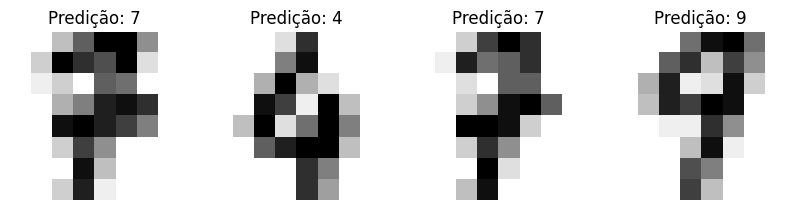

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, predição in zip(axes, testeEntrada, testeClassific):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r,)
    ax.set_title(f"Predição: {predição}")

In [ ]:
confusion_matrix(y_test, testeClassific)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  1,  0,  1,  0,  4,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  0, 58,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  1,  0, 54,  1],
       [ 0,  0,  0,  0,  1,  1,  0,  1,  1, 47]])